<a href="https://colab.research.google.com/github/Borislove/salary-analysis-643-py/blob/main/salary_analysis_643_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#------------Option---------
pd.options.display.expand_frame_repr = False

In [ ]:
# ---------DATA-------------
url = 'https://raw.githubusercontent.com/Borislove/files/main/data/data.csv'
DATA = pd.read_csv(url, index_col=0)
DATA.head(3)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
,,,,,,,,,,,,,,,,,,,,,
Образование,1240.0,1833.0,2927.0,3387.0,4203.0,5430.0,6983.0,8778.0,11317.0,13294.0,...,25862.0,26928.0,28088.0,30258.0,34361.0,37072.0,39563.0,43391.0,48400.0,54263.0
Здравоохранение и предоставление социальных услуг,1333.0,1960.0,3141.0,3663.0,4612.0,5906.0,8060.0,10037.0,13049.0,14820.0,...,27068.0,28179.0,29742.0,31980.0,40027.0,43122.0,49532.0,50690.0,55420.0,61486.0
Государственное управление и обеспечение военной безопасности; социальное страхование,2712.0,3755.0,5200.0,6914.0,7899.0,10959.0,13477.0,16896.0,21344.0,23960.0,...,42659.0,41916.0,43611.0,43500.0,47803.0,50991.0,54496.0,58620.0,63505.0,73861.0


In [ ]:
#
education = DATA.values[0]
healthcare = DATA.values[1]
security = DATA.values[2]
inflation = DATA.values[3]

columns = DATA.columns

txt = 'Средняя заработная плата в сфере: '
txt_education = 'Образование'
txt_healthcare = 'Здравоохранение и предоставление социальных услуг'
txt_security = 'Государственное управление и обеспечение военной безопасности; социальное страхование'
txt_inflation = 'Инфляция'


In [ ]:
# Инфляция
DATA.iloc[-1]

2000    20.20
2001    18.58
2002    15.06
2003    11.99
2004    11.74
2005    10.91
2006     9.00
2007    11.87
2008    13.28
2009     8.80
2010     8.78
2011     6.10
2012     6.58
2013     6.45
2014    11.36
2015    12.91
2016     5.38
2017     2.52
2018     4.27
2019     3.05
2020     4.91
2021     8.39
2022    11.92
2023     7.42
Name: Инфляция, dtype: float64

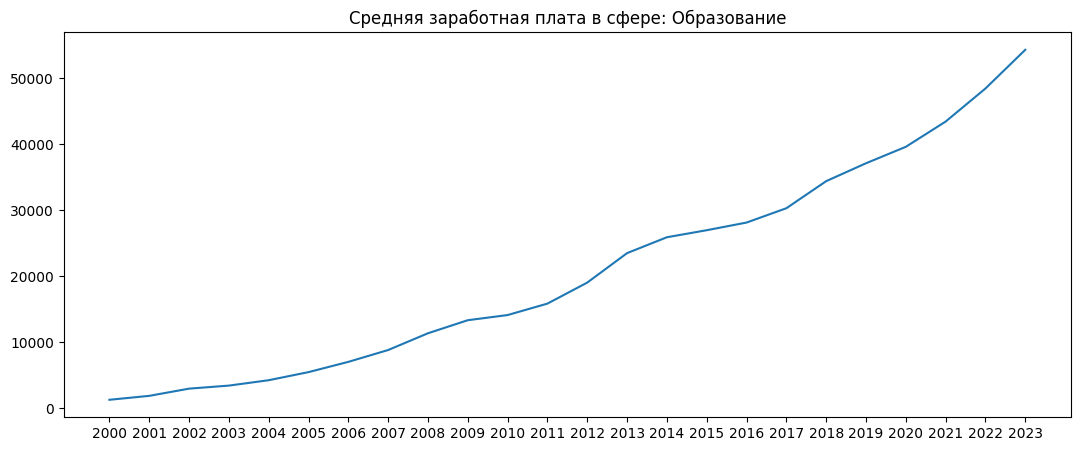

In [ ]:
# Образование без учета инфляции
plt.figure(figsize=(13, 5))
plt.title(txt + txt_education)
plt.plot(columns, education)
plt.show()

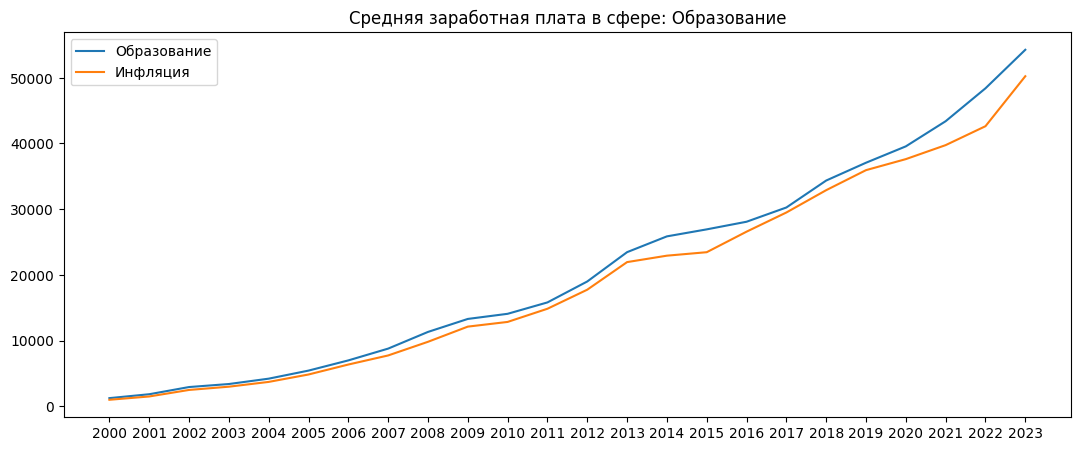

In [ ]:
plt.figure(figsize=(13, 5))
plt.title(txt + txt_education)
plt.plot(columns, education)
plt.plot(columns, (1- inflation / 100 ) * education)
plt.legend([txt_education, txt_inflation])
plt.show()

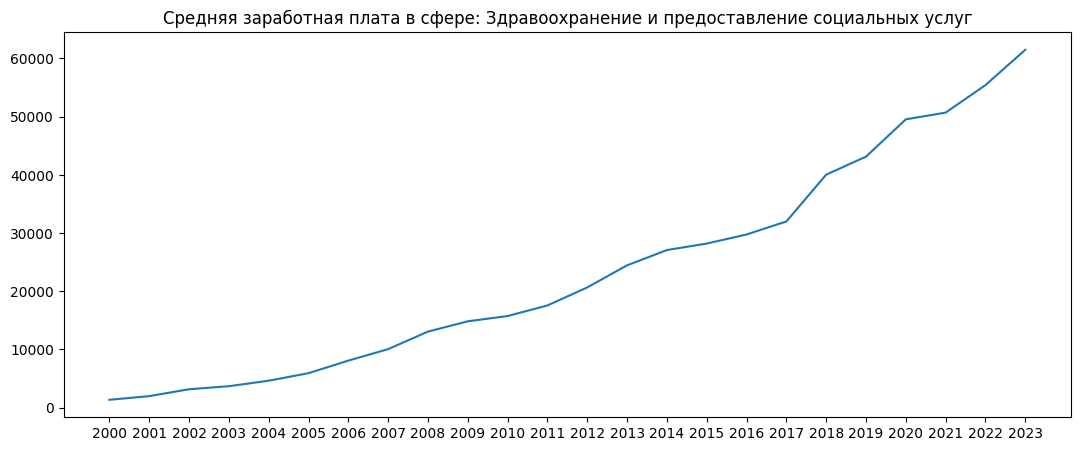

In [ ]:
# Здравоохранение и предоставление социальных услуг без учета инфляции
plt.figure(figsize=(13, 5))
plt.title(txt + txt_healthcare)
plt.plot(columns, healthcare)
plt.show()

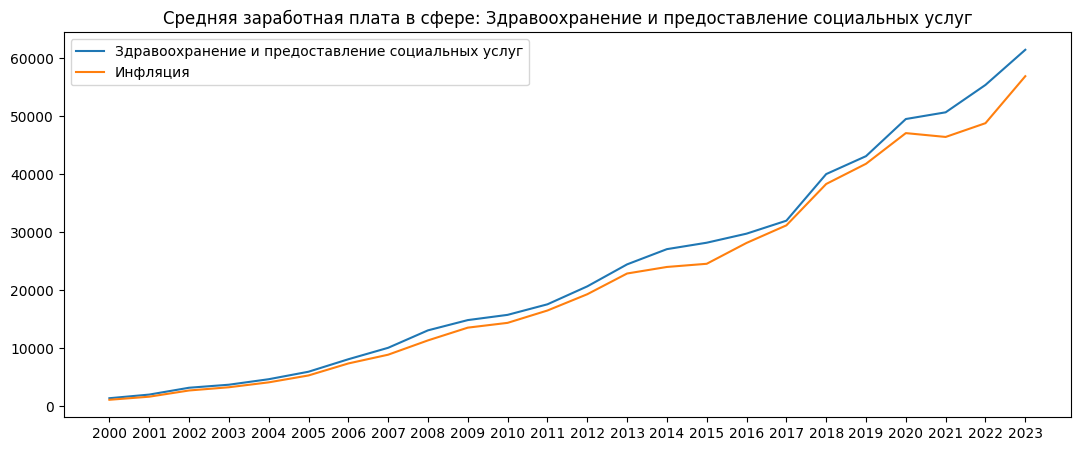

In [ ]:
# Здравоохранение и предоставление социальных услуг без учета инфляции
plt.figure(figsize=(13, 5))
plt.title(txt + txt_healthcare)
plt.plot(columns, healthcare)
plt.plot(columns, (1- inflation / 100 ) * healthcare)
plt.legend([txt_healthcare, txt_inflation])
plt.show()

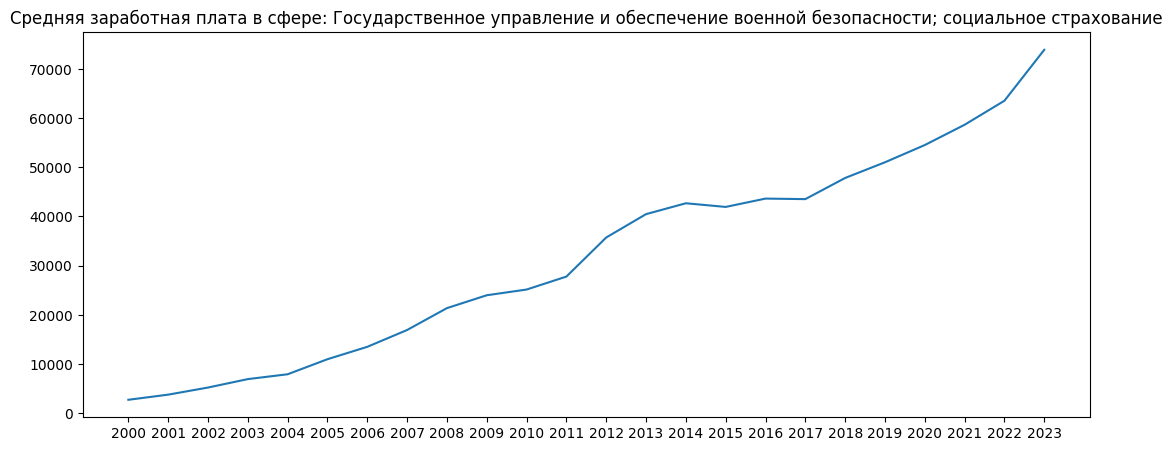

In [ ]:
# Государственное управление и обеспечение военной безопасности; социальное страхование без учета инфляции
plt.figure(figsize=(13, 5))
plt.title(txt + txt_security)
plt.plot(columns, security)
plt.show()

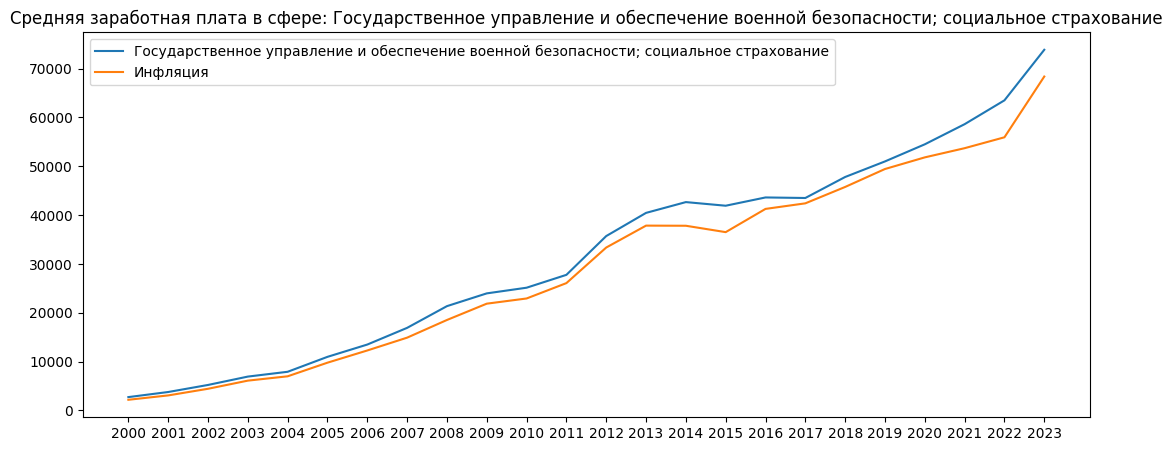

In [ ]:
plt.figure(figsize=(13, 5))
plt.title(txt + txt_security)
plt.plot(columns, security)
plt.plot(columns, (1- inflation / 100 ) * security)
plt.legend([txt_security, txt_inflation])
plt.show()

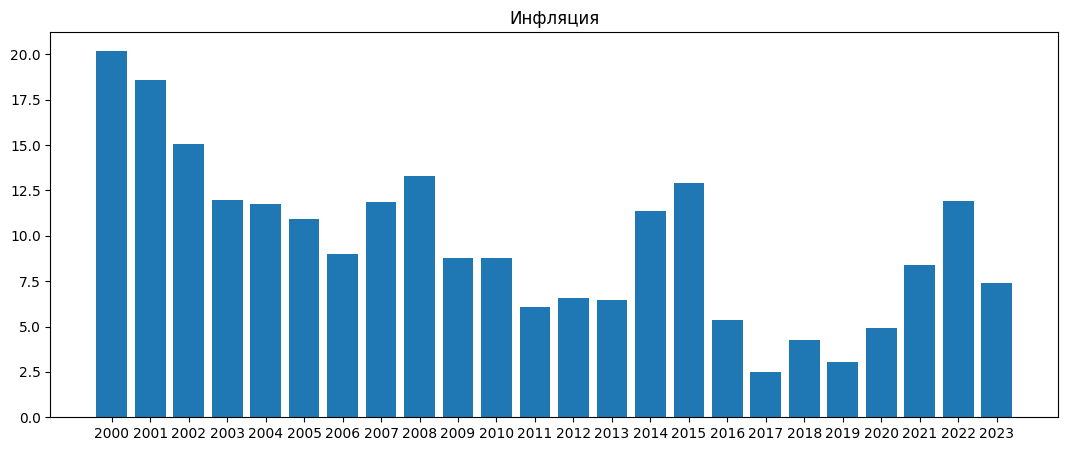

In [ ]:
# инфляция
plt.figure(figsize=(13, 5))
plt.title(txt_inflation)
plt.bar(columns, inflation)
plt.show()

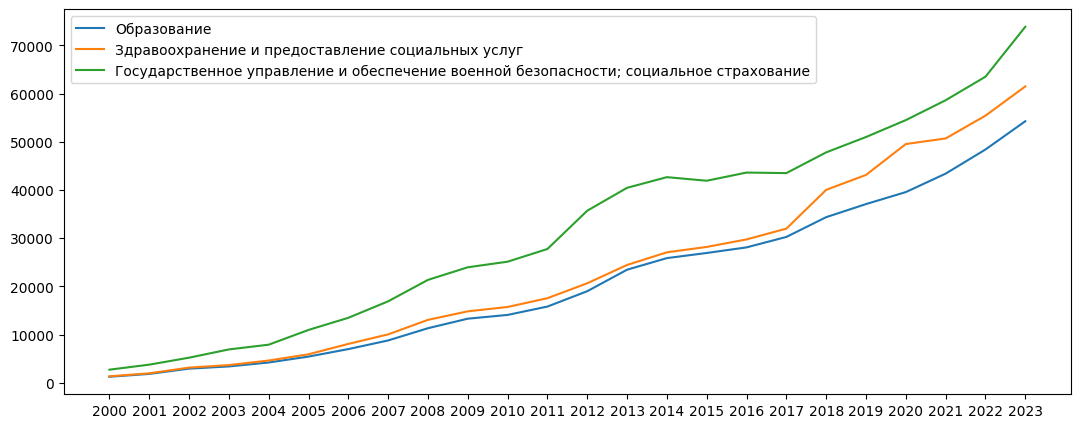

In [ ]:
# общее
plt.figure(figsize=(13, 5))
plt.plot(columns, education)
plt.plot(columns, healthcare)
plt.plot(columns, security)
plt.legend([txt_education, txt_healthcare,txt_security])
plt.show()
